In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Please upload the train and test datasets.")
uploaded = files.upload()
uploaded = files.upload()
train_data = pd.read_csv('train[1].csv')
test_data = pd.read_csv('test[2].csv')
print(train_data.head())
print(test_data.head())

Please upload the train and test datasets.


Saving test[2].csv to test[2] (3).csv


Saving train[1].csv to train[1] (3).csv
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

In [ ]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
z_scores = np.abs(stats.zscore(train_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = train_data[~outliers]
print(f"Original dataset shape: {train_data.shape}")
print(f"Dataset shape after outlier removal: {data_no_outliers.shape}")

Original dataset shape: (2000, 21)
Dataset shape after outlier removal: (1988, 21)


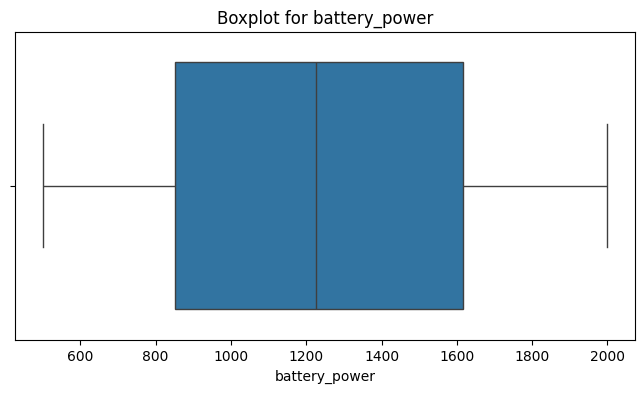

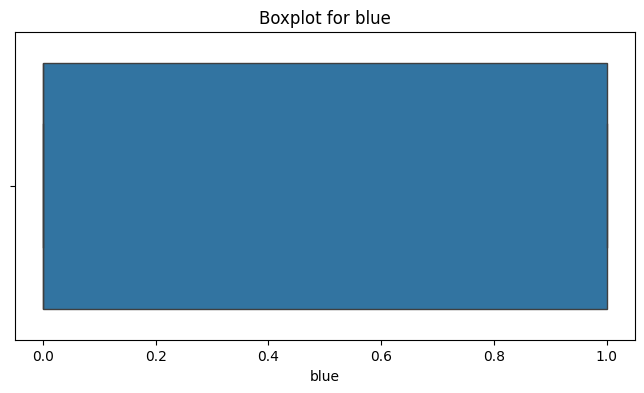

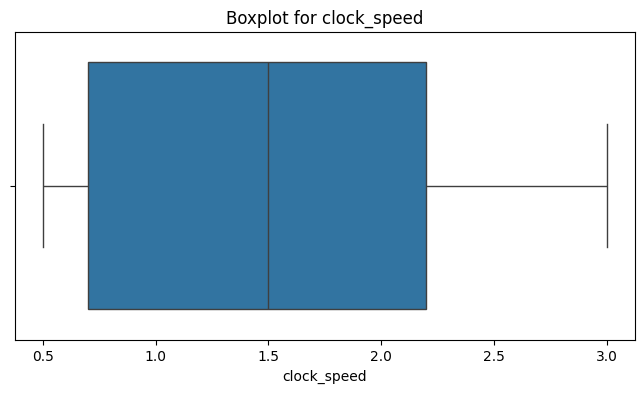

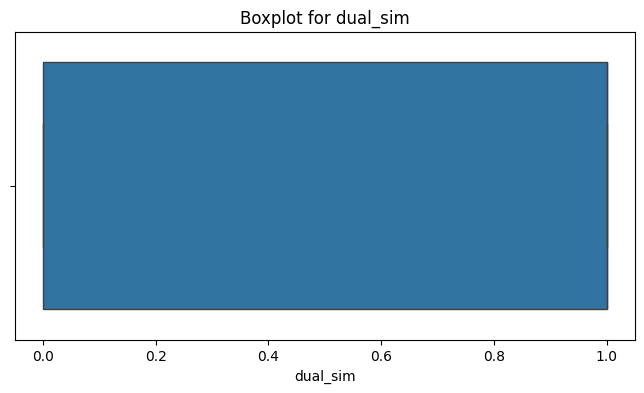

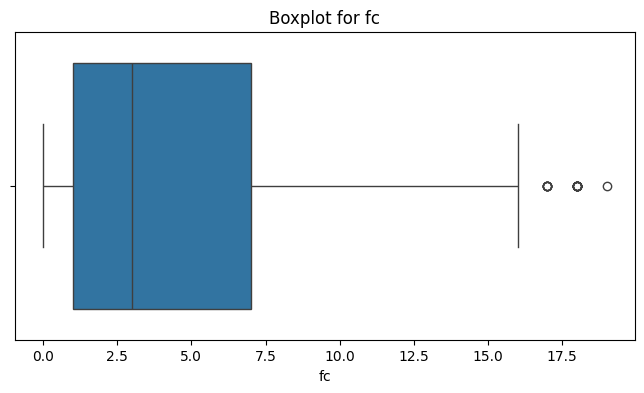

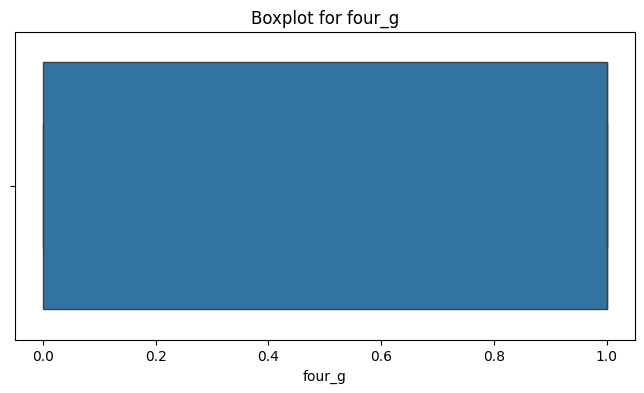

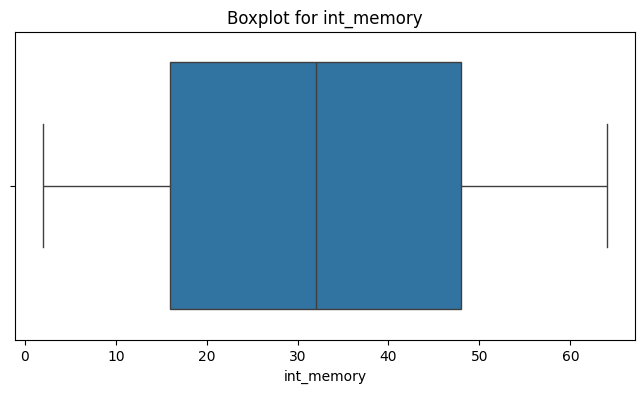

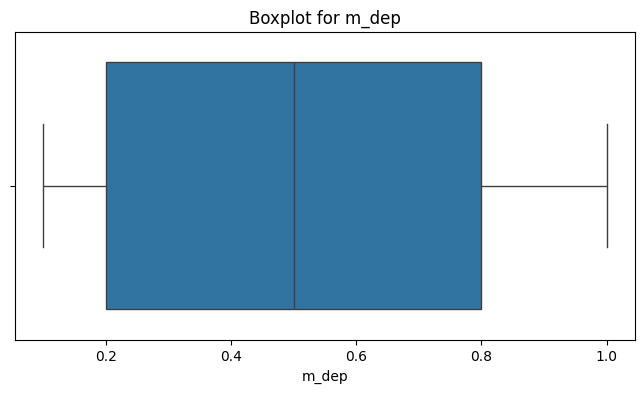

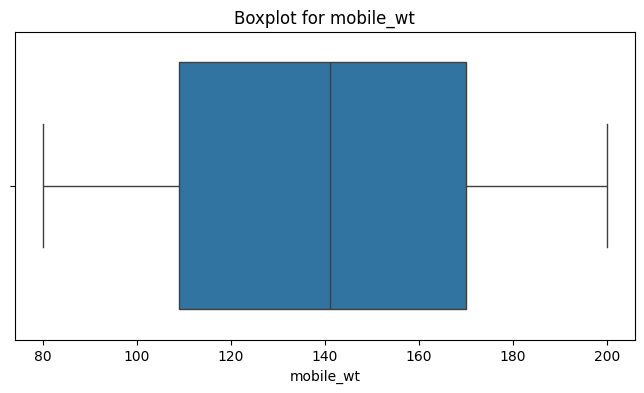

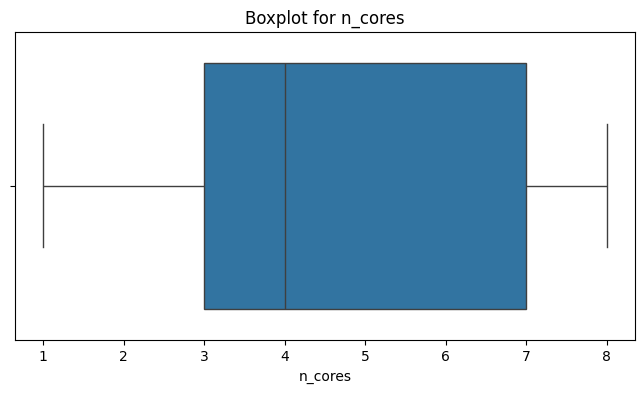

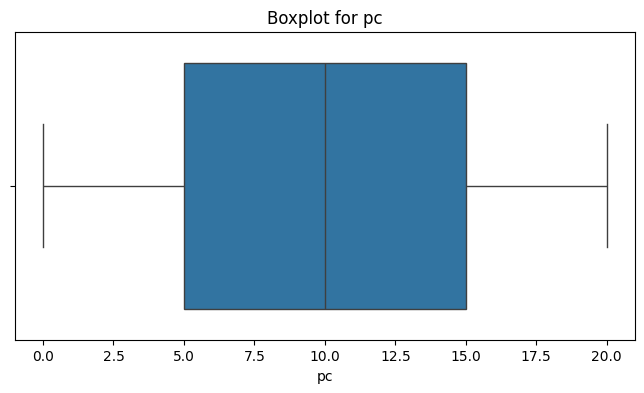

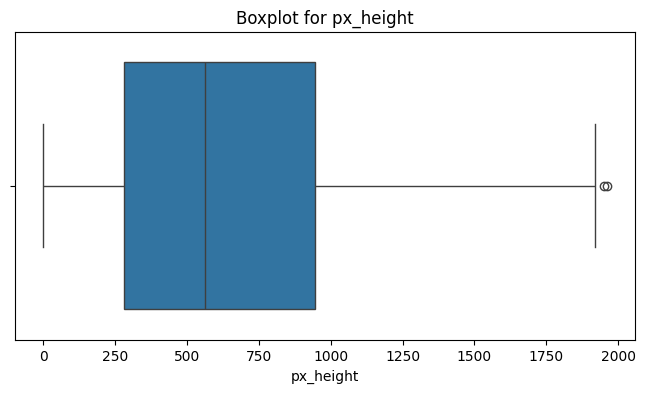

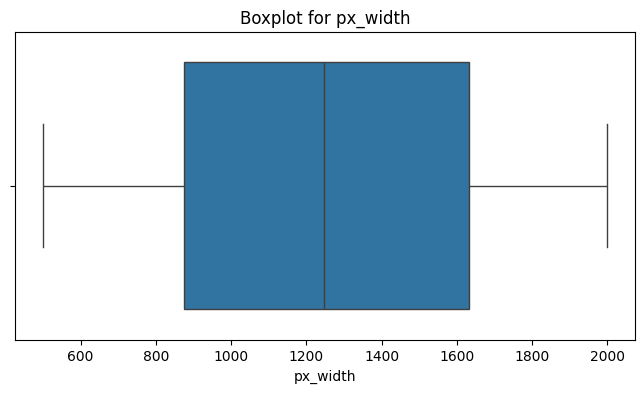

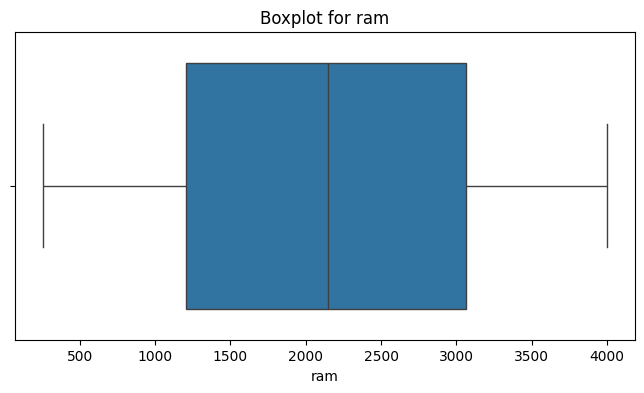

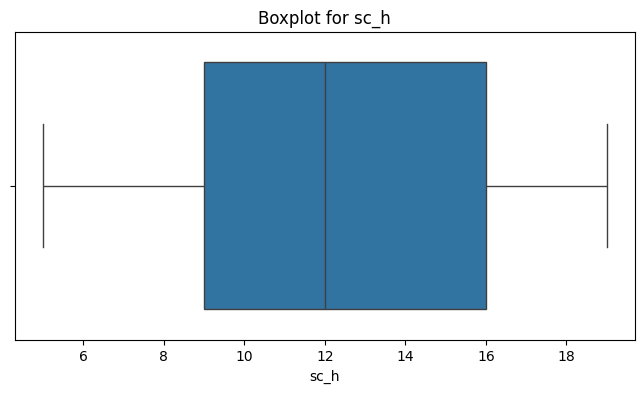

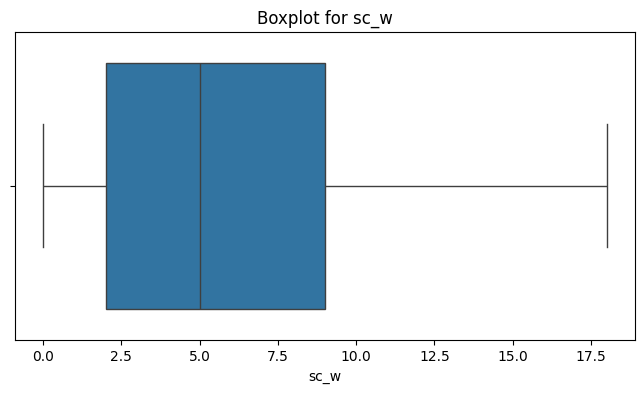

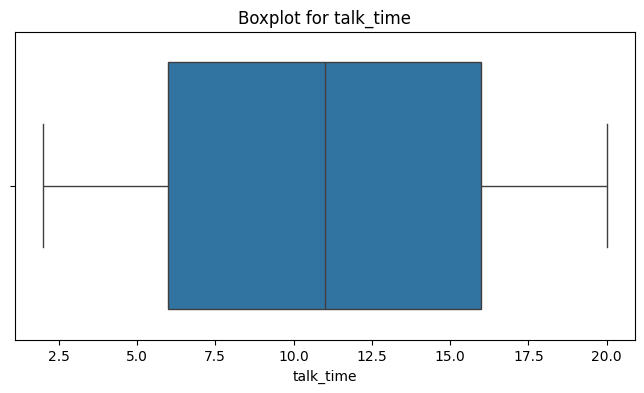

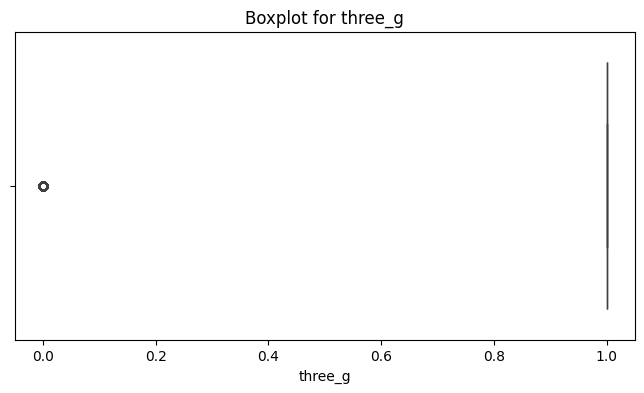

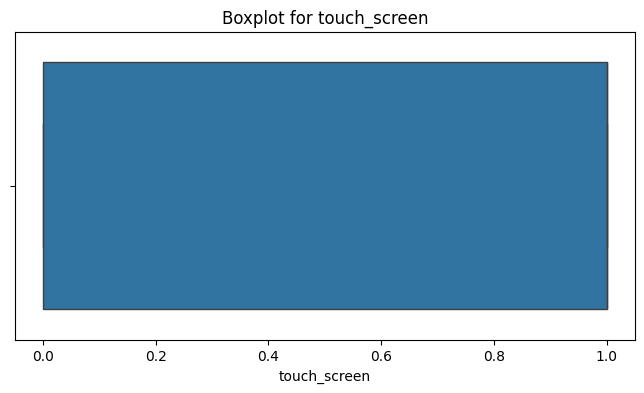

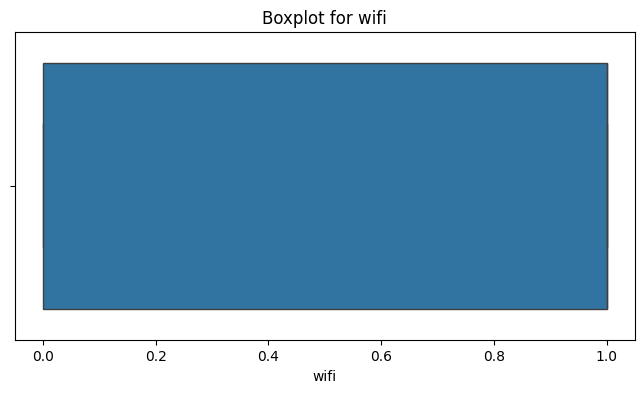

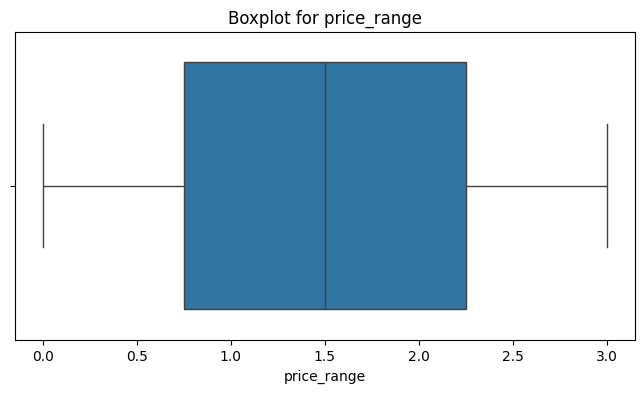

In [ ]:
numeric_features = train_data.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
missing_values = train_data.isnull().sum()
print("Missing values before imputation:")
print(missing_values)


Missing values before imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
numeric_features = train_data.select_dtypes(include=[np.number]).columns
categorical_features = train_data.select_dtypes(include=[object]).columns

In [ ]:
for col in numeric_features:
 train_data[col] = num_imputer.fit_transform(train_data[[col]])

In [ ]:
for col in categorical_features:
 train_data[col] = cat_imputer.fit_transform(train_data[[col]]).ravel()
print("Missing values after imputation:")
print(train_data.isnull().sum())

Missing values after imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
train_data['Price_Per_Ram'] = train_data['price_range'] / train_data['ram']

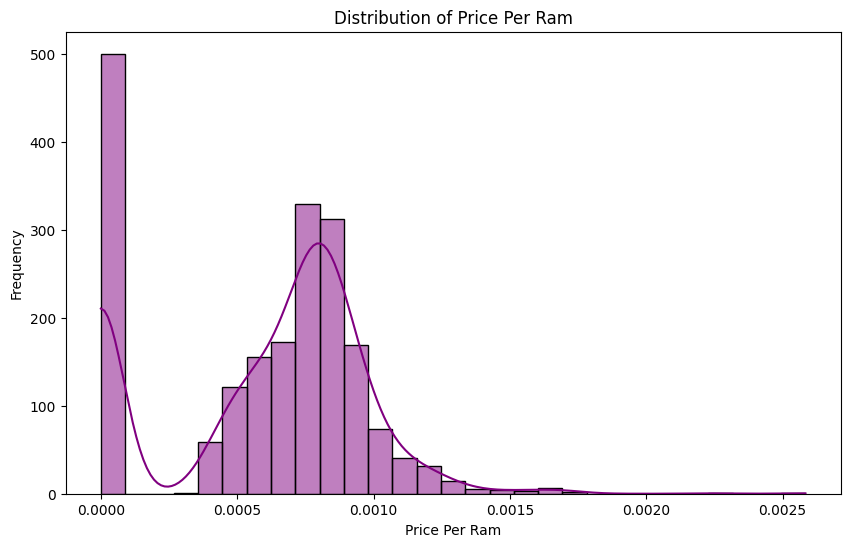

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Price_Per_Ram'], kde=True, color='purple')
plt.title("Distribution of Price Per Ram")
plt.xlabel("Price Per Ram")
plt.ylabel("Frequency")
plt.show()

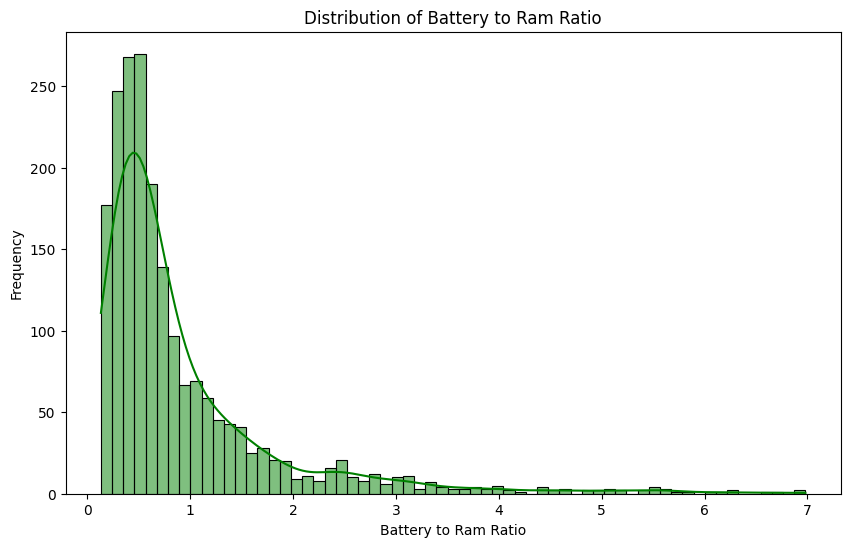

In [ ]:
train_data['Battery_to_Ram_Ratio'] = train_data['battery_power'] / train_data['ram']
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Battery_to_Ram_Ratio'], kde=True, color='green')
plt.title("Distribution of Battery to Ram Ratio")
plt.xlabel("Battery to Ram Ratio")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = pd.get_dummies(train_data.drop('price_range', axis=1), drop_first=True)
y = train_data['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [ ]:
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Gradient Boosting R-squared: {gb_r2:.4f}")
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Gradient Boosting Mean Squared Error: {gb_mse:.4f}")

Random Forest R-squared: 0.9999
Gradient Boosting R-squared: 0.9998
Random Forest Mean Squared Error: 0.0001
Gradient Boosting Mean Squared Error: 0.0003


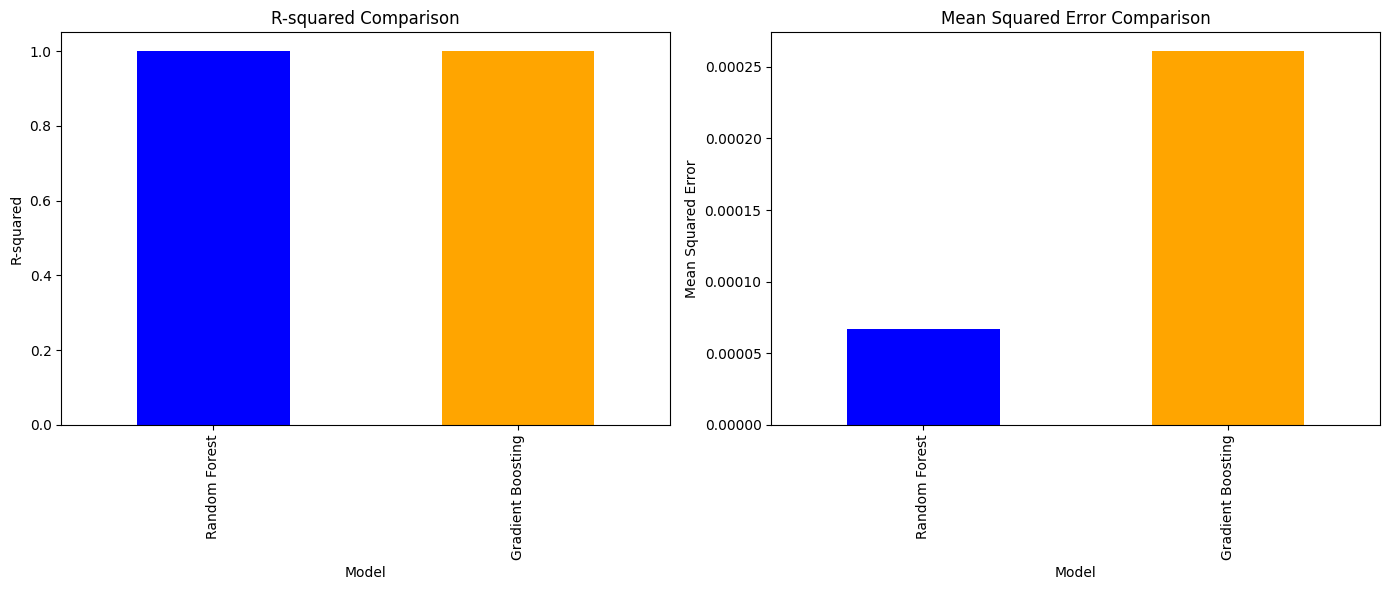

Random Forest is the better model.


In [ ]:
metrics = pd.DataFrame({
'Model': ['Random Forest', 'Gradient Boosting'],
'R-squared': [rf_r2, gb_r2],
'Mean Squared Error': [rf_mse, gb_mse]
})
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
metrics.set_index('Model')['R-squared'].plot(kind='bar', color=['blue', 'orange'], ax=axes[0])
axes[0].set_title("R-squared Comparison")
axes[0].set_ylabel("R-squared")
metrics.set_index('Model')['Mean Squared Error'].plot(kind='bar', color=['blue', 'orange'],
ax=axes[1])
axes[1].set_title("Mean Squared Error Comparison")
axes[1].set_ylabel("Mean Squared Error")
plt.tight_layout()
plt.show()
if rf_r2 > gb_r2:
 print("Random Forest is the better model.")
else:
 print("Gradient Boosting is the better model.")

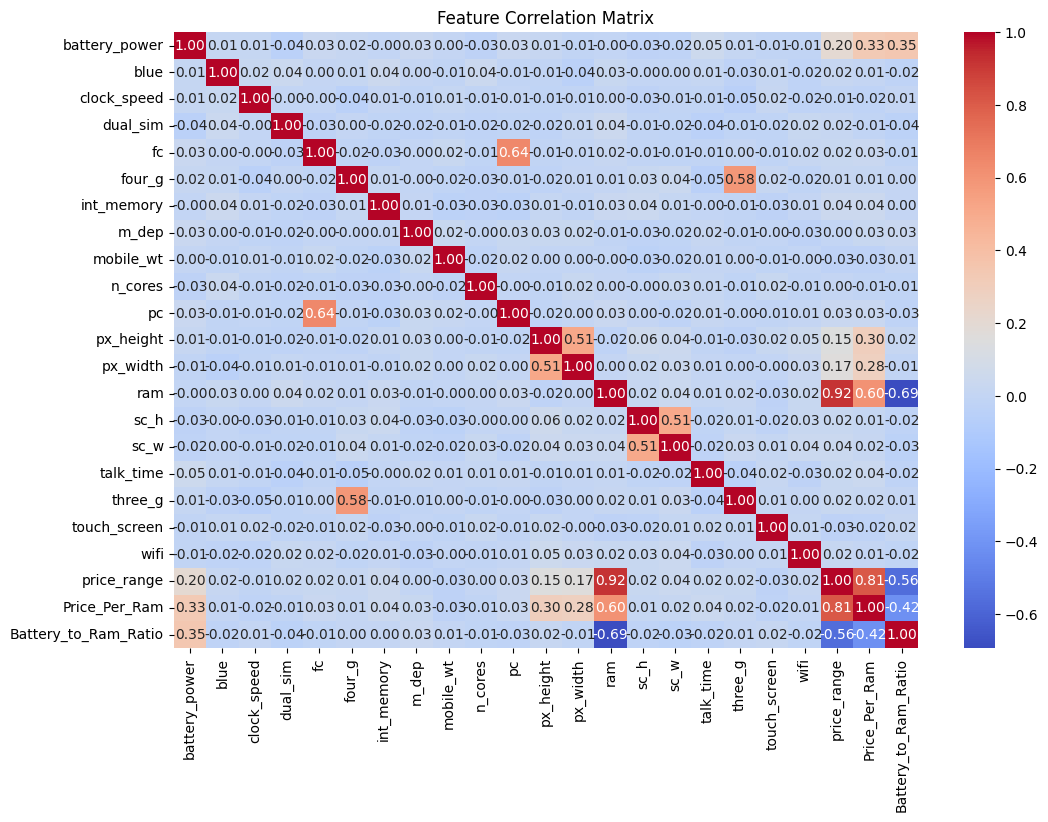

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()